## Problem Statement: You going out, Do you need umbrella ? 

- **State:** Rainy , Cloudy and Sunny
-  **Actions**: Umbrell & no umbrella
-  **Reward** : Dict mapping with each state action pair
-  Transition probability 
-  Discount factor


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 


In [5]:
states =  ['Rainy' , 'Cloudy' , 'Sunny'] 
actions = ['umbrella' , 'no umbrella'] 
rewards = { 'Rainy' :  {'umbrella:' : -1 , "no umbrella" : -5 } ,
           'Cloudy' :  {'umbrella:' : -1 , "no umbrella" : -1 } ,
           'Rainy' :  {'umbrella:' : -5 , "no umbrella" : -1 } ,       
          
          } 

transation =  {
    'Rainy' : {"umbrella" : { 'Rainy' : 0.7  , 'Cloudy' : 0.3 , 'Sunny' : 0}, 
               "no umbrella" : { 'Rainy' : 0.3  , 'Cloudy' : 0.5 , 'Sunny' : 0.3}} ,
    'Cloudy' : {"umbrella" : { 'Rainy' : 0.4  , 'Cloudy' : 0.6, 'Sunny' : 0}, 
               "no umbrella" : { 'Rainy' : 0 , 'Cloudy' : 0.7 , 'Sunny' : 0}} ,
    'Sunny' : {"umbrella" : { 'Rainy' : 0  , 'Cloudy' : 0., 'Sunny' : 1}, 
               "no umbrella" : { 'Rainy' : 0.7  , 'Cloudy' : 0.4 , 'Sunny' : 0.6}} 
              
               
               
}

discountfactor = 0.9  

In [7]:
def value_iteration() :  
    #init the value fn for each state to 0
    V = {s : 0  for s in states} 
    while True  : 
        #compute the updated value fn for each state 
        new_V = {} 
        for s in states : 
            values = []  
            for a in actions : 
                value  = rewards[s][a]
                for s2 in states : 
                    value += discountfactor * transation[s][a][s2] * V[s2]
                values.append(value) 
            new_V = max(values) 
            #check for convergence 
            if all(abs(V[s] - new_V[s]) < 0.0001 for s in states) :  
                return new_V 
            V =  new_V 
            

V = value_iteration() 

KeyError: 'umbrella'

In [8]:
states = ['Rainy', 'Cloudy', 'Sunny']
actions = ['umbrella', 'no umbrella']

rewards = {
    'Rainy': {'umbrella': -1, 'no umbrella': -5},
    'Cloudy': {'umbrella': -1, 'no umbrella': -1},
    'Sunny': {'umbrella': -5, 'no umbrella': -1}
}

transition = {
    'Rainy': {
        'umbrella': {'Rainy': 0.7, 'Cloudy': 0.3, 'Sunny': 0},
        'no umbrella': {'Rainy': 0.3, 'Cloudy': 0.5, 'Sunny': 0.3}
    },
    'Cloudy': {
        'umbrella': {'Rainy': 0.4, 'Cloudy': 0.6, 'Sunny': 0},
        'no umbrella': {'Rainy': 0, 'Cloudy': 0.7, 'Sunny': 0}
    },
    'Sunny': {
        'umbrella': {'Rainy': 0, 'Cloudy': 0, 'Sunny': 1},
        'no umbrella': {'Rainy': 0.7, 'Cloudy': 0.4, 'Sunny': 0.6}
    }
}

discountfactor = 0.9

def value_iteration():
    V = {s: 0 for s in states}
    while True:
        new_V = {}
        for s in states:
            values = []
            for a in actions:
                value = rewards[s][a]
                for s2 in states:
                    value += discountfactor * transition[s][a][s2] * V[s2]
                values.append(value)
            new_V[s] = max(values)
        if all(abs(V[s] - new_V[s]) < 0.0001 for s in states):
            return new_V
        V = new_V

V = value_iteration()
print(V)


{'Rainy': -4.674920787172077, 'Cloudy': -2.7027010758234944, 'Sunny': -10.691570578450396}


Optimal policy:
{'Rainy': 'umbrella', 'Cloudy': 'no umbrella', 'Sunny': 'no umbrella'}


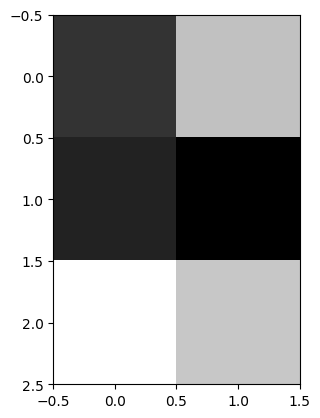

In [13]:
policy = {}
for s in states:
    values = []
    for a in actions:
        value = rewards[s][a]
        for s2 in states:
            value += discountfactor * transition[s][a][s2] * V[s2]
        values.append(value)
    policy[s] = actions[np.argmax(values)]

print("Optimal policy:")
print(policy)

# Plot
policy_values = np.zeros((len(states), len(actions)))
for i, s in enumerate(states):
    for j, a in enumerate(actions):
        policy_values[i, j] = rewards[s][a] + discountfactor * sum(transition[s][a][s2] * V[s2] for s2 in states)
plt.imshow(policy_values, cmap='Greys')